 # **Netflix Movies and Tv Shows Clustering**

#### **Project Type** - Unsupervised
#### **Contribution** - Individual
#### **Team Member** - Ajit Sharad Mane (ajitmane36@gmail.com / +918888288752)

## **<u>Project Summary</u>**

The Netflix Movies and TV Shows Clustering project aims to cluster similar movies and tv shows available on Netflix into different clusters based on their content. The project begins with data collected from the third-party Netflix search engine, which contains information about more than 7,000 movies and TV shows available on the platform.

The data set contained details about movies and TV shows available on Netflix. Descriptive statistics were computed for each variable as part of the analysis, and visualizations were made to investigate the relationships between the various variables. We created a number of graphs, such as the scatterplot, distplot, count plot, bar plot, pair plot, heatmap, pie plot, and box plot to gain insight from the dataset.

The dataset containing 12 columns and 7787 rows. This dataset contains no values that are duplicates. The some values for the director, cast, country, date added, and rating are null. Everything else is categorical, with the exception of the numerical feature release year. Although the datatype of the date_added feature's dates incorrectly associates an object, it contains dates.

In 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their respective features, director, cast, country, date_added, and rating had null values. These null values have been replaced by director Unavailable, Cast Unavailability, and Country Unavailable, respectively, because there are several null values for features like director, cast, and country. Due to the extremely low quantity of null values for features like date_added and rating, we eliminated those null values.

The interquartile range is successfully used to treat outliers from the variable release year. Before eliminating the feature date added, it was converted to datetime and used to generate additional features like year added, month added, and day added. Geners is the new name assigned to the listed in feature. The feature release year data type is changed from float64 to int64 because year cannot be a float.

After doing univariate, bivariate, and multivariate analyses, we discovered insights that are as follows :

- More movies (69.14%) than TV shows (30.86%) are available on Netflix.
- The majority of Netflix movies were released between 2015 and 2020, and the majority of   Netflix TV shows were released between 2018 and 2020.
- The most movies and TV shows were released for public viewing on Netflix in 2017 and 2020, respectively, out of all released years.
- From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.
- More TV shows will be released for public viewing in 2020 and 2021 than at any other time in the history of Netflix.
- The majority of TV shows and movies available on Netflix have a TV-MA rating, with a TV-14 rating coming in second.
- The majority of movies added to Netflix in 2019 and the majority of TV shows added to - Netflix in 2020.
- In 2019, Netflix added nearly one-fourth (27.71%) of all content (TV shows and movies).
- The majority of the content added to Netflix was in October and January, respectively, but almost all months throughout the year saw Netflix adding content to its platform.
- Netflix has more movies (69.14%) than TV shows (30.86%).
- The majority of movies available on Netflix are produced in the United States, with India coming in second.
- The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.
- Raul Campos and Jan Suter directed most of the movies available on Netflix for public viewing.
- Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.
- International movies and the second-most popular dramas are available on Netflix as content.
- Actors who have appeared in films and TV shows that are most available on Netflix are Lee, Michel, David, Jhon, and James.
- We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.
- Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
- We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

We processed text data from the description variable by removing punctuation, stopwords, whitespace, emails, html tags, urls, special characters, and digits. Vectorized after lemmanization and got a TFIDF matrix for feeding to the model as input. We trained various clustering algorithms, such as KMeans clustering, Hierarchical clustering, and DBSCAN.  

Among all models, the K-Means clustering model has the highest Calinski-Harabasz score (9.039247). Also, the K-Means Clustering model has a silhouette_score of 0.004634, which is closer to 1 than other models, which means the K-Means Clustering model is capable of perfectly clustering items.

We faced the following challenges when building models: [1] Identifying the number of clusters is a difficult task. [2] The Kelbow method and silhouette score method take a long time to show the results for finding the ideal number of clusters.

## **<u>GitHub Link</u>**

https://github.com/ajitmane36/Netflix-Movies-and-Tv-Shows-Clustering-ML-Unsupervised.git

## **<u>Problem Statement</u>**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do :
- Exploratory Data Analysis
- Understanding what type content is available in different countries
- Is Netflix has increasingly focusing on TV rather than movies in recent years.
- Clustering similar content by matching text-based features

## **<u>Data Description</u>**

- **show_id :** Unique ID for every Movie / Tv Show
- **type :** Identifier - A Movie or TV Show
- **title :** Title of the Movie / Tv Show
- **director :** Director of the Movie / TV Show
- **cast :** Actors involved
- **country :** Country of production
- **date_added :** Date it was added on Netflix
- **release_year :** Actual Release year of the movie / TV show
- **rating :** TV Rating of the movie / TV show
- **duration :** Total Duration in minutes or number of seasons
- **listed_in :** Geners
- **description :** The Summary description

In [1]:
#### Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Updating nltk library
import nltk
nltk.download('stopwords')
nltk.download('punkt')


# Importing stopwords from nltk library
from nltk.corpus import stopwords

# Import punctuations
import string

# Import regex library
import re

# Import BeautifulSoup library
from bs4 import BeautifulSoup

# For stemming to corpus
from nltk.stem.porter import PorterStemmer

# For corpus lemmatization
from nltk.stem import WordNetLemmatizer

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# For pretty-printing tabular data
from tabulate import tabulate

# KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# Importing clustering Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Install yellowbrick library
!pip install yellowbrick

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Importing algorithams for building model
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import LatentDirichletAllocation

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [2]:
# Loading Dataset
df=pd.read_csv(r"G:\Data Science\Almabetter\Almabetter Capstone Projects\4. Unsupervised Machine Learning\1. Netflix Movies and Tv Shows Clustering\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
# First Five Observations
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Last five observations
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


## **<u>Data Inispection</u>**

In [5]:
# Checking shape of the dataset
df.shape
print(f'Dataset having {df.shape[0]} rows and {df.shape[1]} columns')

Dataset having 7787 rows and 12 columns


In [6]:
# Checking columns name of dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


- Director, cast, country, date_added, and rating all have null values.
- The date_added feature contains dates, but its datatype incorrectly associates an object. 

In [8]:
# Basic description of Dataset of all numerical variables
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


- The feature release_year is numerical.
- All TV shows and movies available on Netflix were released between years 1925 and 2021.

In [9]:
# Basic description of Dataset of all categorical variables
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


- Movies are more widely available on Netflix than TV shows. 
- Most of the movies and TV shows are produced in the United States.
- Documentaries are available in the majority of movies and TV shows on Netflix.

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
director,2389
cast,718
country,507
date_added,10
rating,7
show_id,0
type,0
title,0
release_year,0


#### <b><u>Observations :</u></b>
- **dataset having 7787 rows and 12 columns**
- **There are no duplicate values in this dataset.**
- **Director, cast, country, date_added, and rating all have null values.**
- **The feature release year is numerical, and everything else is categorical.**
- **The date_added feature contains dates, but its datatype incorrectly associates an object.**

## **<u>Understanding Variables</u>**

In [12]:
# Variables/Columns of dataset
columns=list(df.columns)
print(columns)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [13]:
# Basic description of all Dataset
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [14]:
# Finding Categorical variables
categorical_variables=[var for var in df.describe(include='object')]
print(f'Dataset having {len(categorical_variables)} categorical variables')
print('~~'*45)
print(categorical_variables)

Dataset having 11 categorical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [15]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print(f'Dataset having {len(numerical_variables)} numerical variables')
print('~~'*45)
print(numerical_variables)

Dataset having 1 numerical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['release_year']


In [16]:
# Unique Values and its frequency for each variable
for var in df.columns:
    print(f'Feature Name : {var}\n')
    category=df[var].value_counts()
    print(category)
    print('~~'*45)

Feature Name : show_id

s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature Name : type

Movie      5377
TV Show    2410
Name: type, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature Name : title

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787

#### <b><u>Observations :</u></b>
- **The following features are included in the dataset:  show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, and description.**
- **Dataset having one numerical variable, release_year.**
- **show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, and description are the 11 categorical variables in this dataset.**

## **<u>Data Wrangling and Feature Engineering</u>**

#### **[1] <u> Handling Duplicate Values</u>**

In [17]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


#### **[2] <u> Handling Null / Missing Values</u>**

In [18]:
# Checking for number of null values
null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


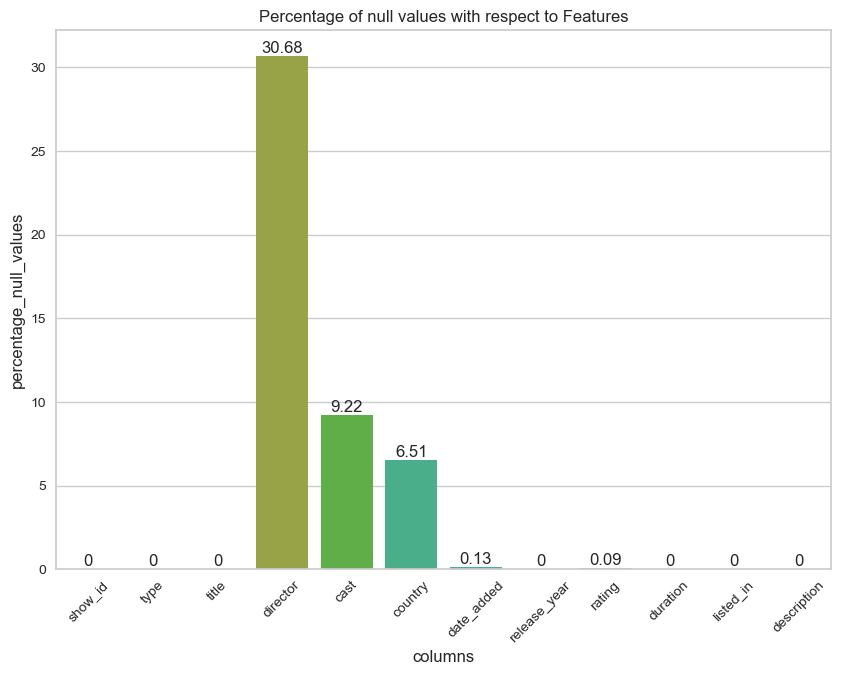

In [19]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

- Director, cast, country, date_added, and rating have null values in 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their respective features. 

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

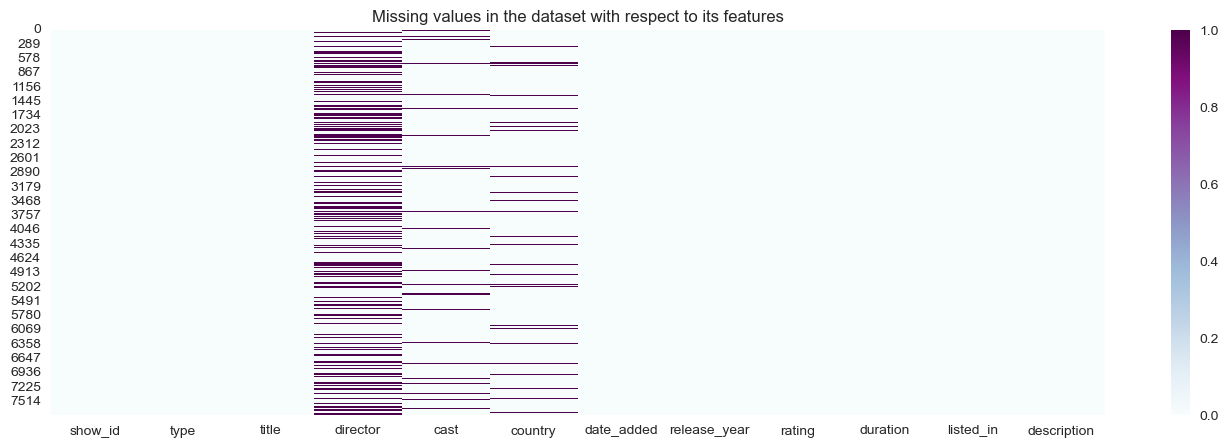

In [20]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True, cmap='BuPu')
plt.title('Missing values in the dataset with respect to its features')

In [21]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['director','cast','country','date_added','rating']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('~~'*45)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart      

In [22]:
## Handling null values

# Filling null values of features director, cast and country
df.director.fillna("Director Unavailable",inplace=True)
df.cast.fillna("Cast Unavailable",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)

# Dropping null values from date_added and rating columns
df.dropna(subset=["date_added",'rating'],inplace=True)

- Since there are many null values for features like director, cast, and country, those null values cannot be dropped; instead, they have been substituted with director Unavailable, Cast Unavailability, and Country Unavailable, accordingly.
- Features such as date_added and rating have a very low number of null values, so we dropped those null values.

In [23]:
# Check for null values that were eliminated or were not successfully eliminated.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
# Nullfree shape of dataset
df.shape

(7770, 12)

#### **[3] <u>Handling Outliers</u>**

__________________________________________________________________________________________


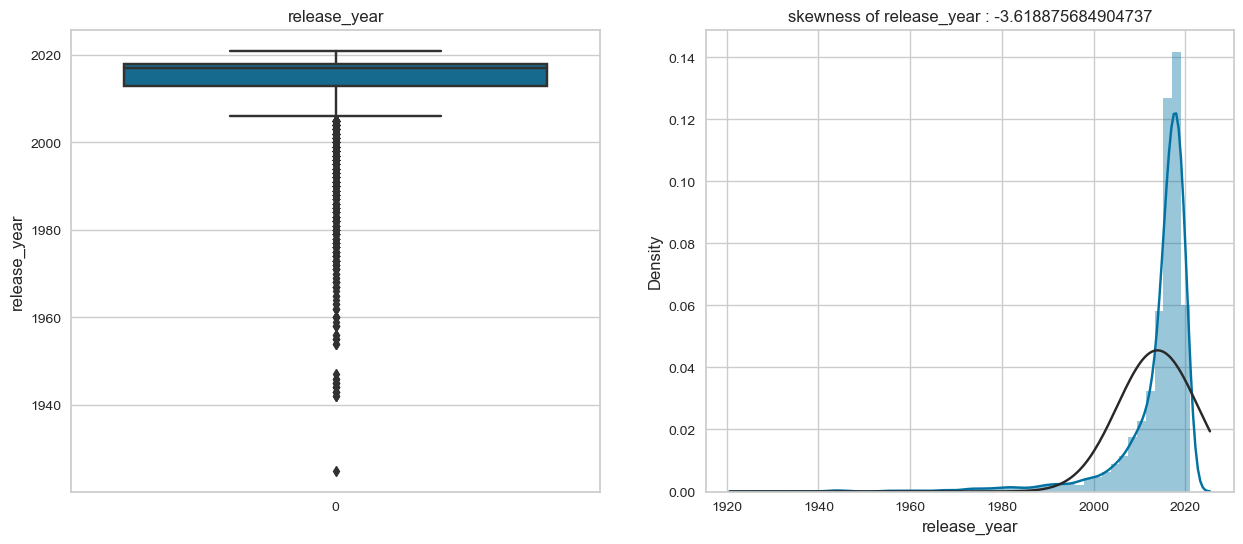

__________________________________________________________________________________________


In [25]:
## Checking for outliers in numerical variables using boxplot

# Importing library for checking normality in distribution
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

- Variable release_year have outliers.

In [26]:
## Using Inter Quartile Range for removing outliers from numerical variables

# Capping dataset
for i in numerical_variables:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


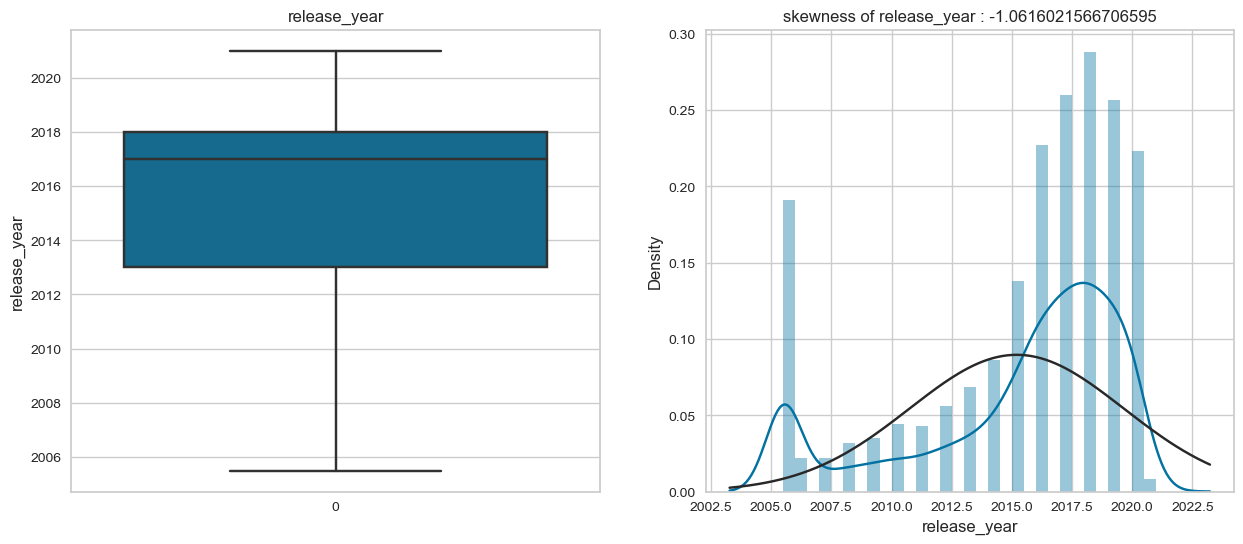

__________________________________________________________________________________________


In [27]:
## Using boxplot checking outliers in features after removed using IQR

for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()
    print('__'*45)

- Outliers from variable release_year are successfully treated using the interquartile range.

#### **[3] <u>Feature Engineering</u>**

In [28]:
# Dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [29]:
# Ensure that features are in the correct data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7770 non-null   object 
 1   type          7770 non-null   object 
 2   title         7770 non-null   object 
 3   director      7770 non-null   object 
 4   cast          7770 non-null   object 
 5   country       7770 non-null   object 
 6   date_added    7770 non-null   object 
 7   release_year  7770 non-null   float64
 8   rating        7770 non-null   object 
 9   duration      7770 non-null   object 
 10  listed_in     7770 non-null   object 
 11  description   7770 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.0+ MB


In [30]:
# Converting the data types of features date_added and release_year to the appropriate data types
df.date_added = pd.to_datetime(df['date_added'])
df.release_year = df.release_year.astype('int64')

# Renaming name of variable listed_in to genre
df.rename = df.rename(columns={'listed_in':'geners'}, inplace=True)

In [31]:
## Adding new features based on feature date_added
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

# Delete feature date_added
df=df.drop('date_added', axis='columns')
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


#### <b><u>Observations :</u></b>
- **There are no duplicate values in this dataset.**
- **director, cast, country, date_added, and rating have null values in 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their respective features.**
- **Because there are numerous null values for features such as director, cast, and country, those null values cannot be dropped; instead, they have been replaced with Director Unavailable, Cast Unavailable, and Country Unavailable, respectively.**
- **Features such as date_added and rating have a very low number of null values, so we dropped those null values.**
- **Outliers from the variable release_year are successfully treated using the interquartile range.**
- **Converted feature date_added to datetime and created new features from it, such as year_added, month_added, and day_added, before removing the feature date_added.** 
- **The listed_in feature has been renamed to geners.**
- **Because year cannot be a float, the feature release_year data type changed from float64 to int64.**

## **<u>Exploratory data analysis</u>**

In [32]:
# Creating new dataframe having all TV shows
tv_shows_df = df[df.type=='TV Show']
tv_shows_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Director Unavailable,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,30
12,s13,TV Show,1994,Diego Enrique Osorno,Cast Unavailable,Mexico,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,17
16,s17,TV Show,Feb-09,Director Unavailable,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,20


In [33]:
# Creating new dataframe having all movies
movies_df = df[df.type == 'Movie']
movies_df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20


#### **<u>[1] Univariate Analysis</u>**

In [34]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [35]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

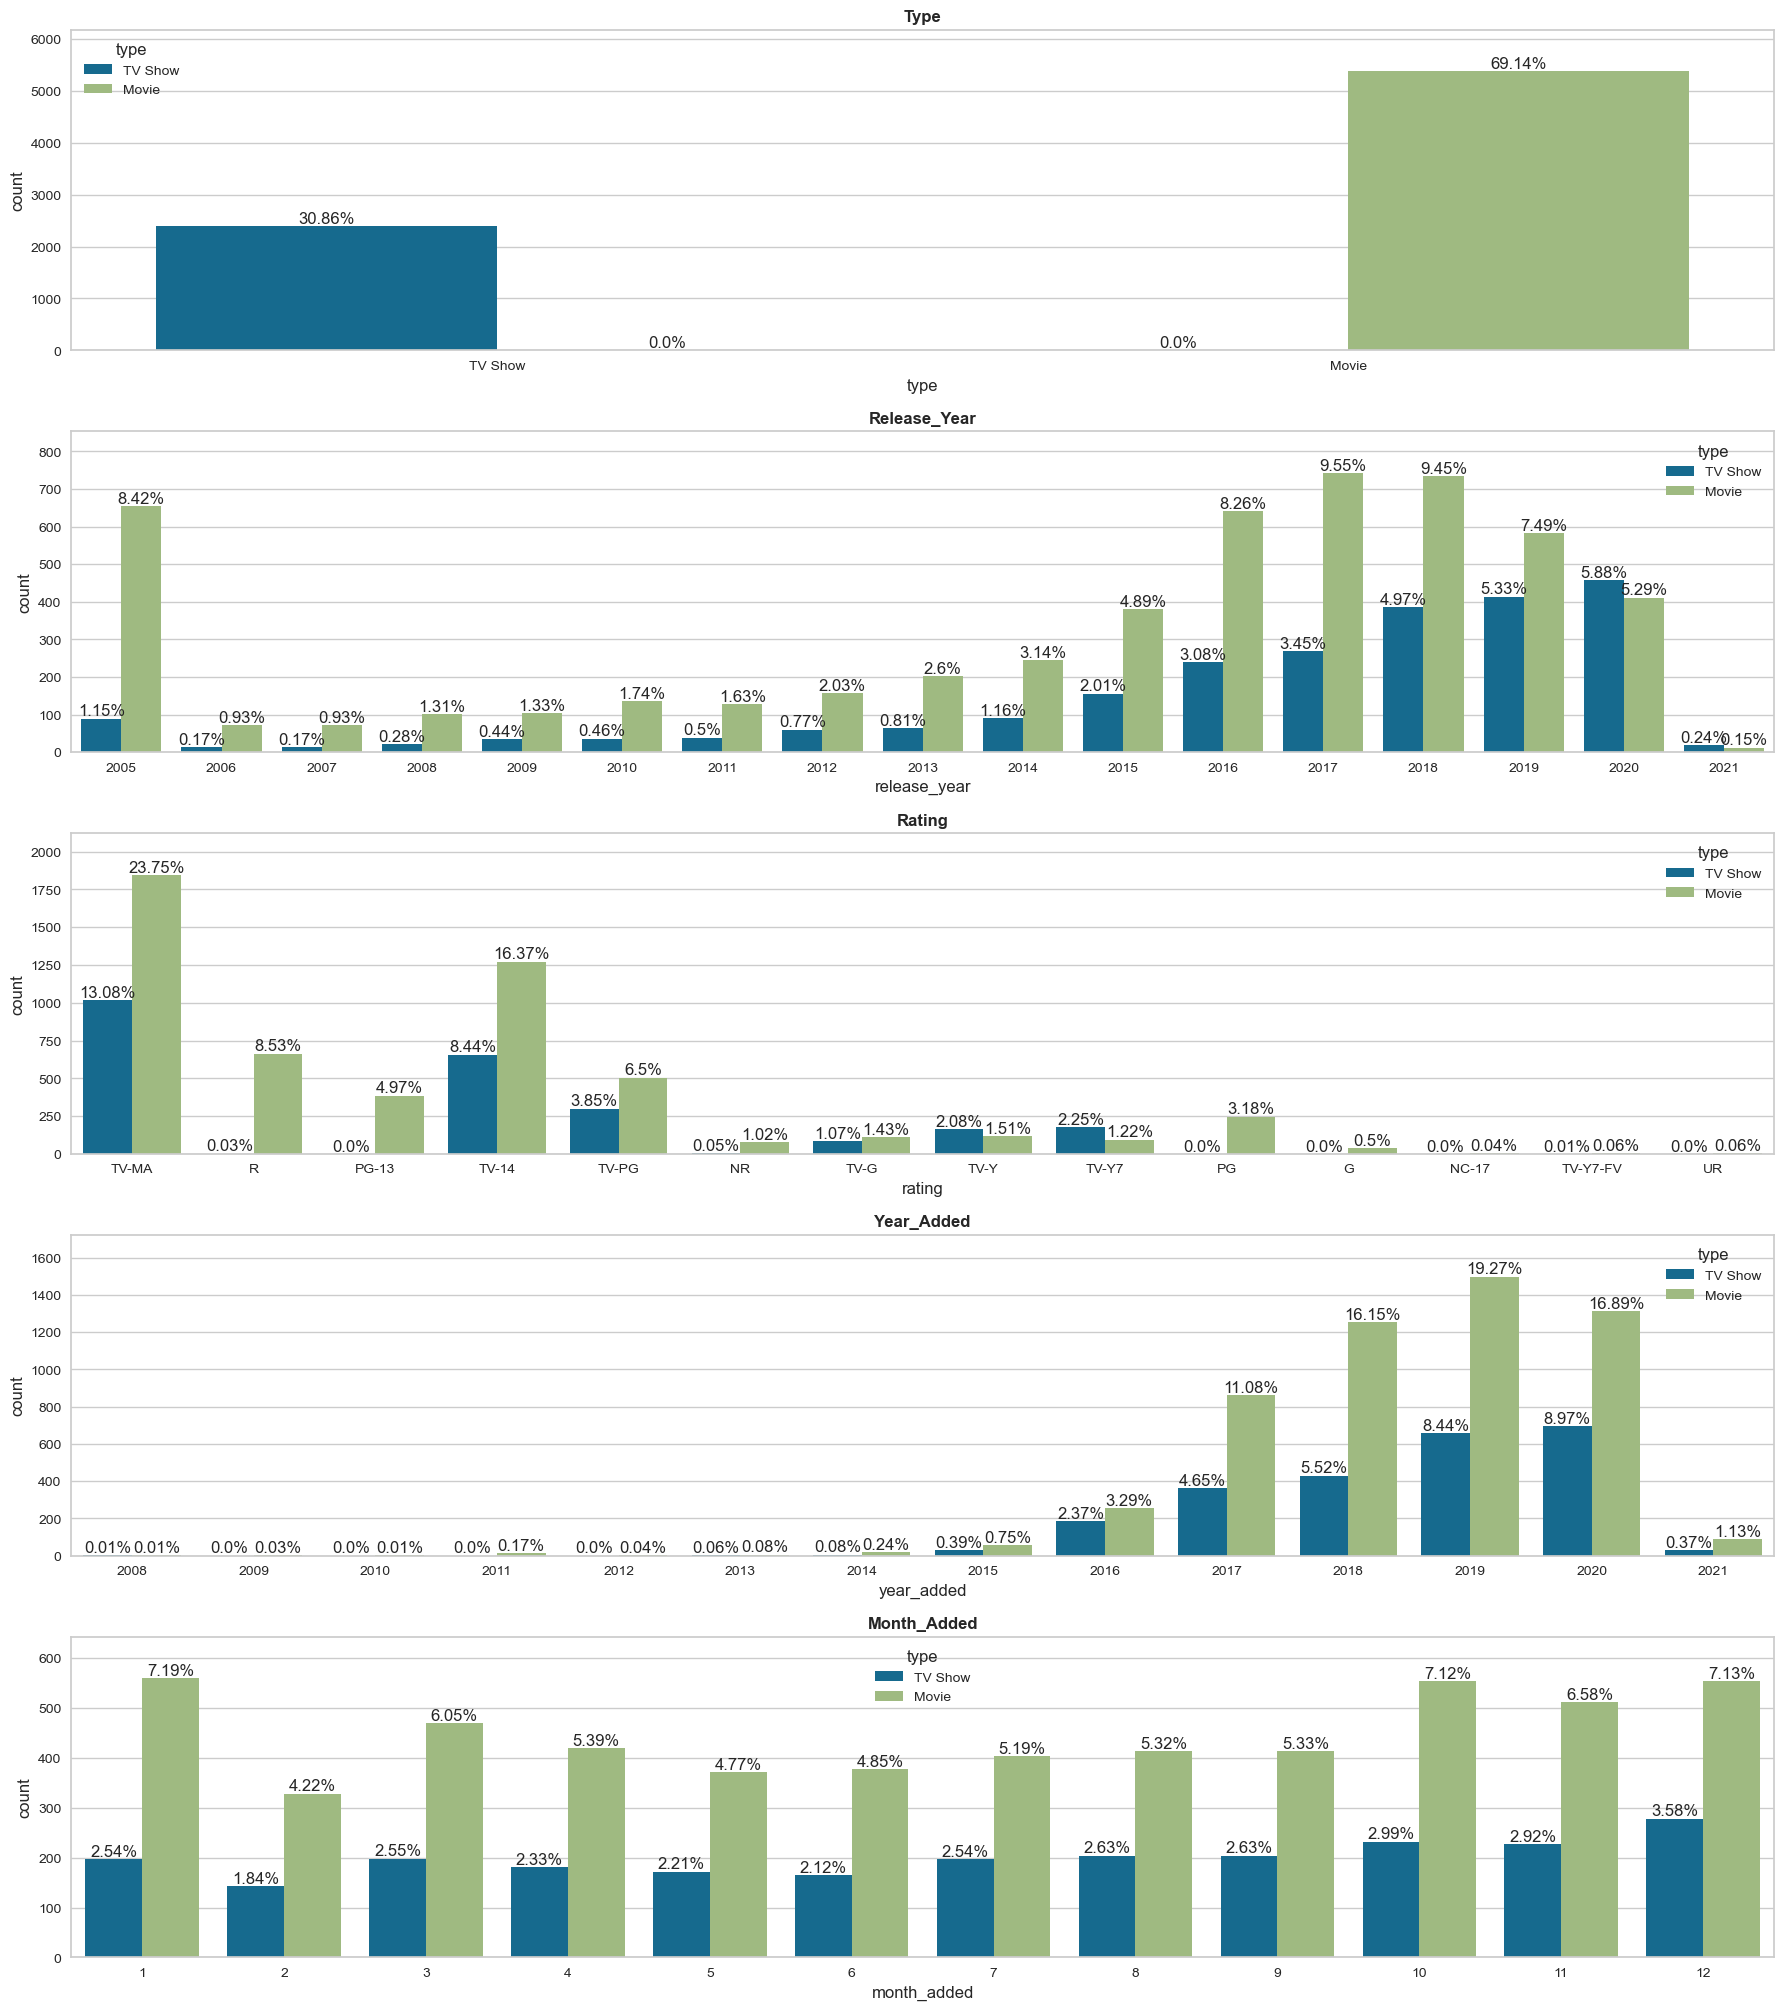

In [36]:
## Plotting the countplots for each variable in target_variables

# Obtaing target variables having maximum 20 categories in features
target_var=[var for var in df.columns if len(df[var].value_counts()) < 20]

plt.figure(figsize=(18,r*4))
for n,var in enumerate(target_var):
    plot = plt.subplot(r,1,n+1)
    ax=sns.countplot(x=df[var], hue=df['type']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

##### <b><u>Observations :</u></b>
- **More movies (69.14%) than TV shows (30.86%) are available on Netflix.**
- **The majority of Netflix movies were released between 2015 and 2020, and the majority of Netflix TV shows were released between 2018 and 2020.**
- **The most movies and TV shows were released for public viewing on Netflix in 2017 and 2020, respectively, out of all released years.**
- **From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.**
- **More TV shows will be released for public viewing in 2020 and 2021 than at any other time in the history of Netflix.**
- **The majority of TV shows and movies available on Netflix have a TV-MA rating, with a TV-14 rating coming in second.**
- **The majority of movies added to Netflix in 2019 and the majority of TV shows added to Netflix in 2020.**
- **In 2019, Netflix added nearly one-fourth (27.71%) of all content (TV shows and movies).**
- **The majority of the content added to Netflix was in October and January, respectively, but almost all months throughout the year saw Netflix adding content to its platform.**

#### **<u>[2] Bivariate Analysis<u>**

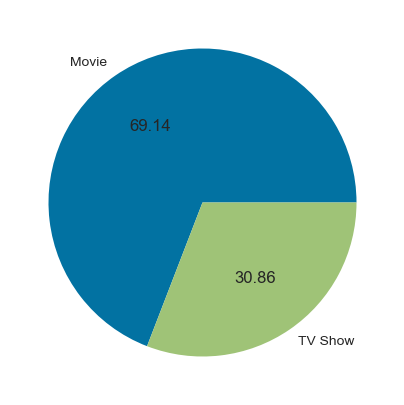

In [37]:
## Number of Movies and TV shows available on Netflix

# Defining figure size
plt.figure(figsize=(5,5))

# Declaring data
type_of_content =df.groupby(by='type').size()

# Plotting data
plt.pie(type_of_content,labels=['Movie','TV Show'],autopct='%.2f')

# Displaying chart
plt.show()

- Netflix has more movies (69.14%) than TV shows (30.86%).

<Figure size 500x500 with 0 Axes>

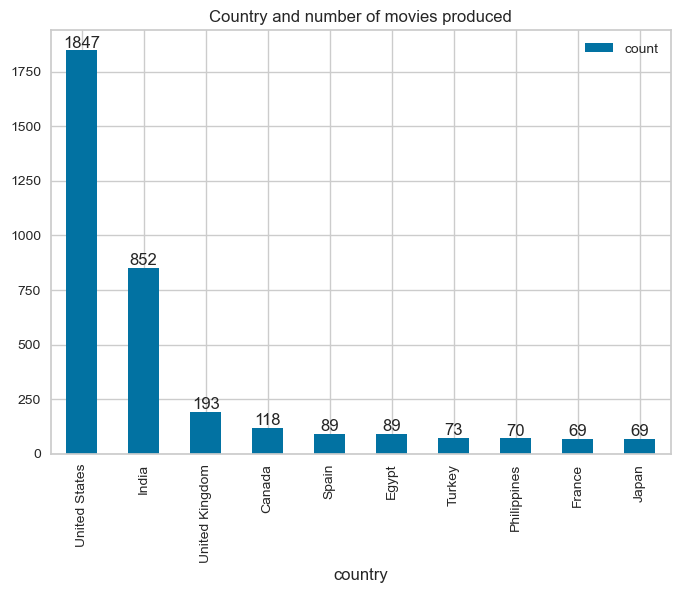

In [38]:
## The country where the majority of movies are produced

# Creating a dataframe for countries where movie are produced and counting them
movie_country_df=pd.DataFrame(movies_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
movie_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
movie_country_df=movie_country_df[movie_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=movie_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.title('Country and number of movies produced')

# Displaying plot
plt.show()

- The majority of movies available on Netflix are produced in the United States, with India coming in second.

<Figure size 500x500 with 0 Axes>

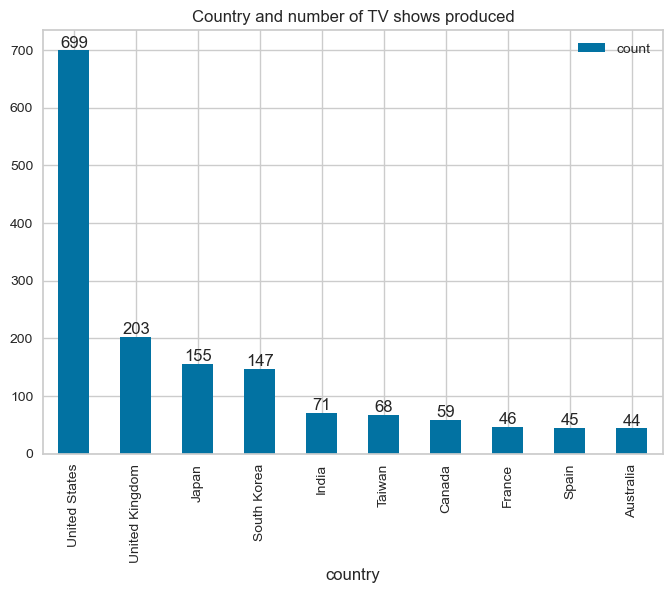

In [39]:
## The country where the majority of TV shows are produced

# Creating a dataframe for countries where TV shows are produced and counting them
tv_show_country_df=pd.DataFrame(tv_shows_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_show_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
tv_show_country_df=tv_show_country_df[tv_show_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=tv_show_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
plt.title('Country and number of TV shows produced')
ax.bar_label(ax.containers[0])

# Displaying plot
plt.show()

- The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.

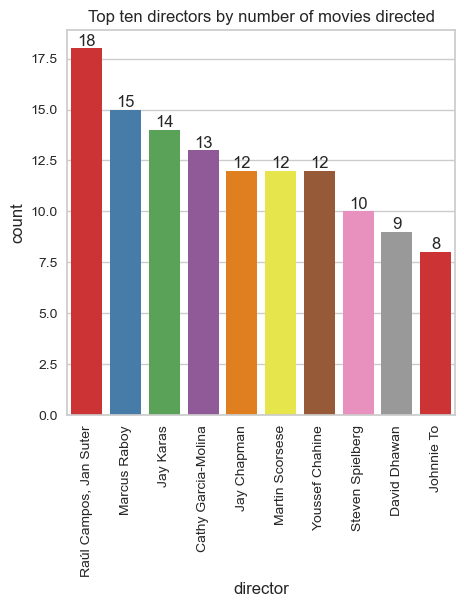

In [40]:
## The directors of the majority of movies

# Removing observations where the director is unavailable
movied_df=movies_df[movies_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=movied_df['director'], order=movied_df.director.value_counts().index[:10], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of movies directed')

# Displaying plot
plt.show()

- Raul Campos and Jan Suter directed most of the movies available on Netflix for public viewing.

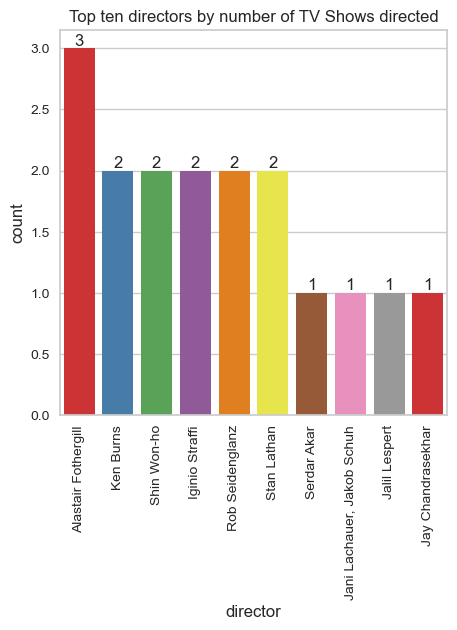

In [41]:
## The directors of the majority of TV Shows

# Removing observations where the director is unavailable
tv_shows_df=tv_shows_df[tv_shows_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of TV Shows
ax=sns.countplot(x=tv_shows_df['director'], order=tv_shows_df.director.value_counts().index[:10],palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of TV Shows directed')

# Displaying plot
plt.show()

- Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.

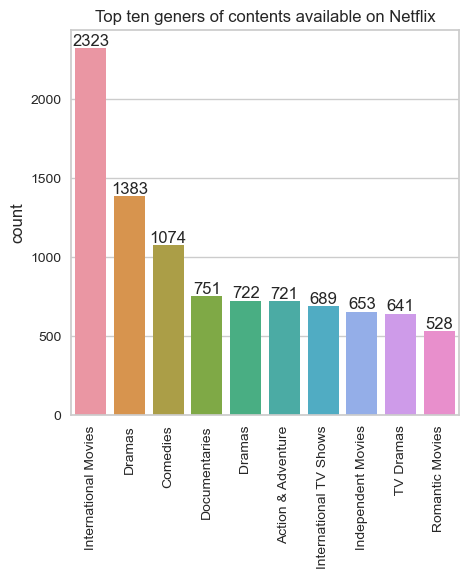

In [42]:
## Netflix's Most Popular Content Genres

# Creating a dataframe for geners
geners_df=df.geners.str.split(',', expand=True).unstack()

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 geners of content available on Netflix
ax=sns.countplot(x=geners_df, order=geners_df.value_counts().index[:10])

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten geners of contents available on Netflix')

# Displaying plot
plt.show()

- International movies and the second-most popular dramas are available on Netflix as content.

In [43]:
# Install worldcloud library in python envirnoment
!pip install wordcloud

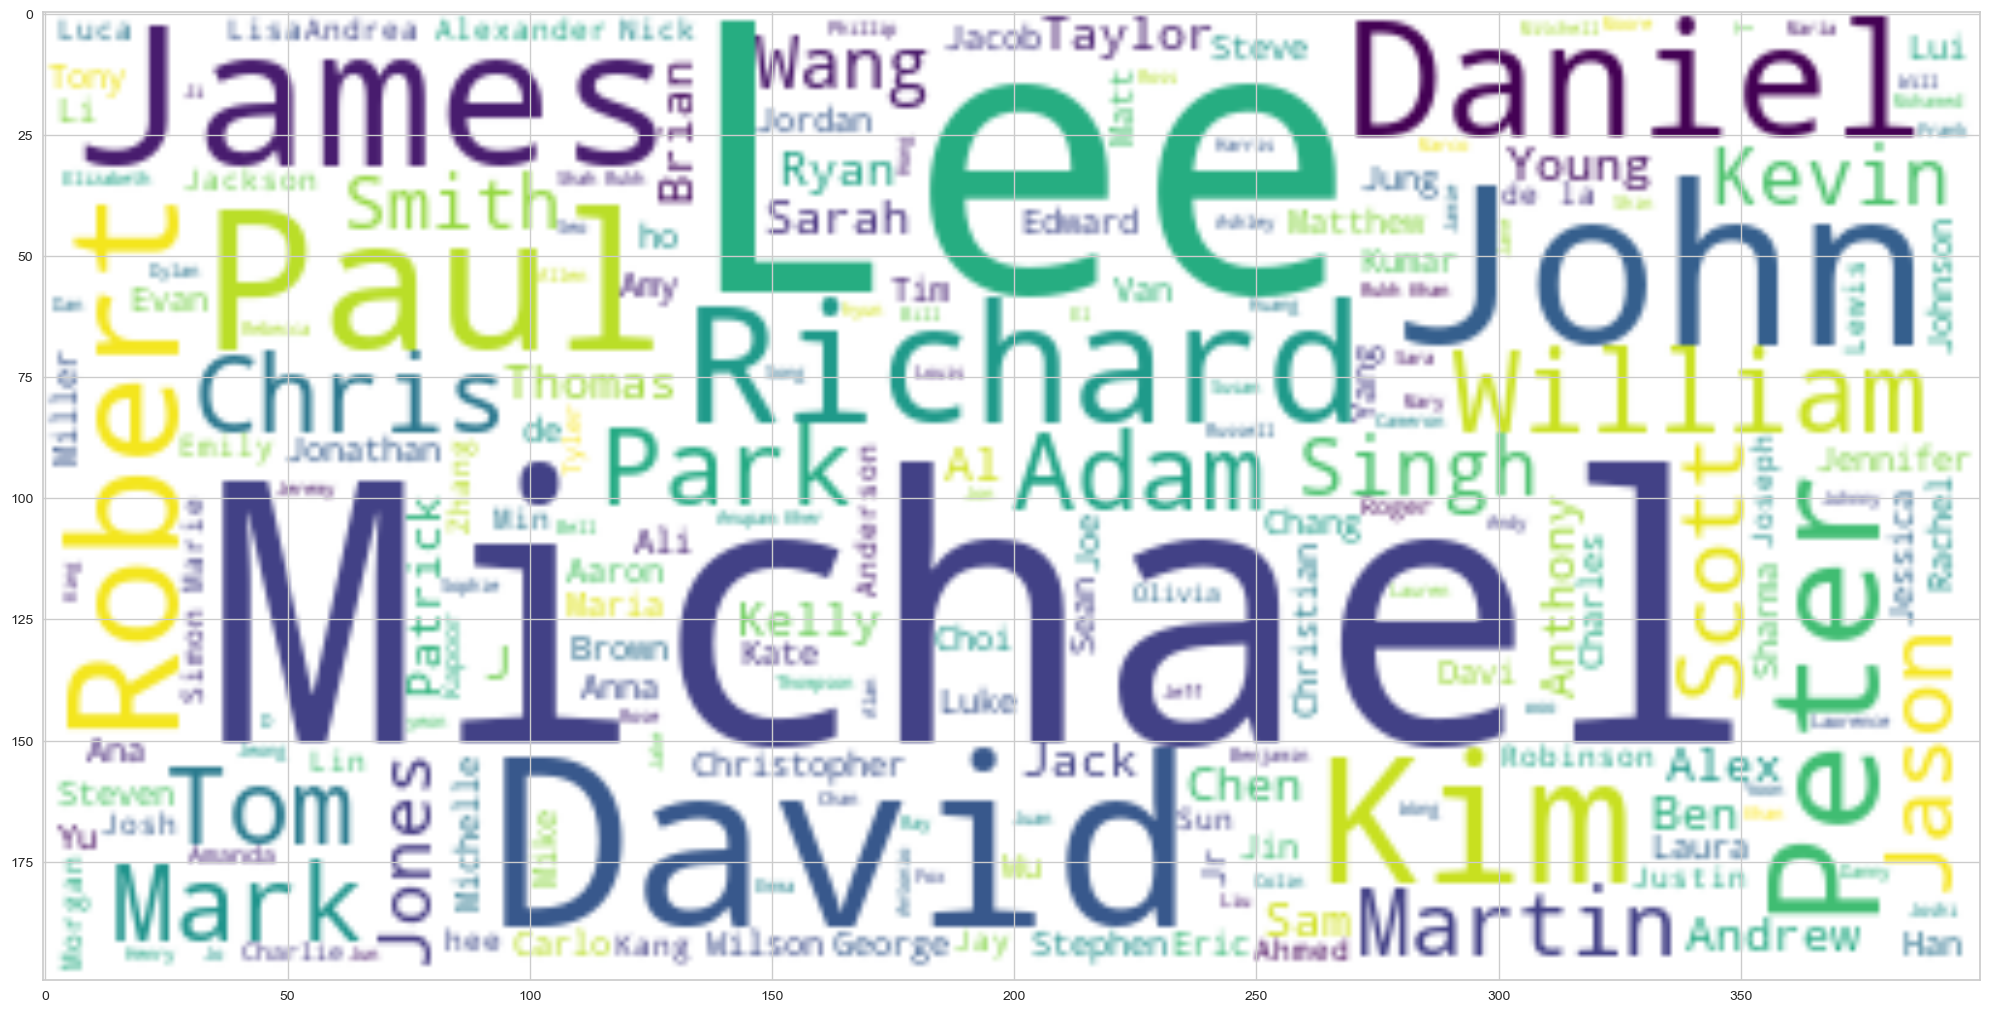

In [44]:
## Wordcloud for actors involved in movies and TV Shows available on Netflix

# Import worldcloud library
from wordcloud import WordCloud

# Defining size of plot
plt.subplots(figsize=(25,15))

# Removing observations where the cast is unavailable
cast_df=df[df['cast'] != 'Cast Unavailable']

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(','.join(cast_df.cast))

# Ploting graph
plt.imshow(wordcloud, interpolation="bilinear")

# Displaying plot
plt.show()

- Actors who have appeared in films and TV shows that are most available on Netflix are Lee, Michel, David, Jhon, and James.

##### <b><u>Observations :</u></b>
- **Netflix has more movies (69.14%) than TV shows (30.86%).**
- **The majority of movies available on Netflix are produced in the United States, with India coming in second.**
- **The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.**
- **Raul Campos and Jan Suter directed most of the movies available on Netflix for public viewing.**
- **Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.**
- **International movies and the second-most popular dramas are available on Netflix as content.**
- **Actors who have appeared in films and TV shows that are most available on Netflix are Lee, Michel, David, Jhon, and James.**

 #### **<u>[3] Multivariate Analysis<u>**

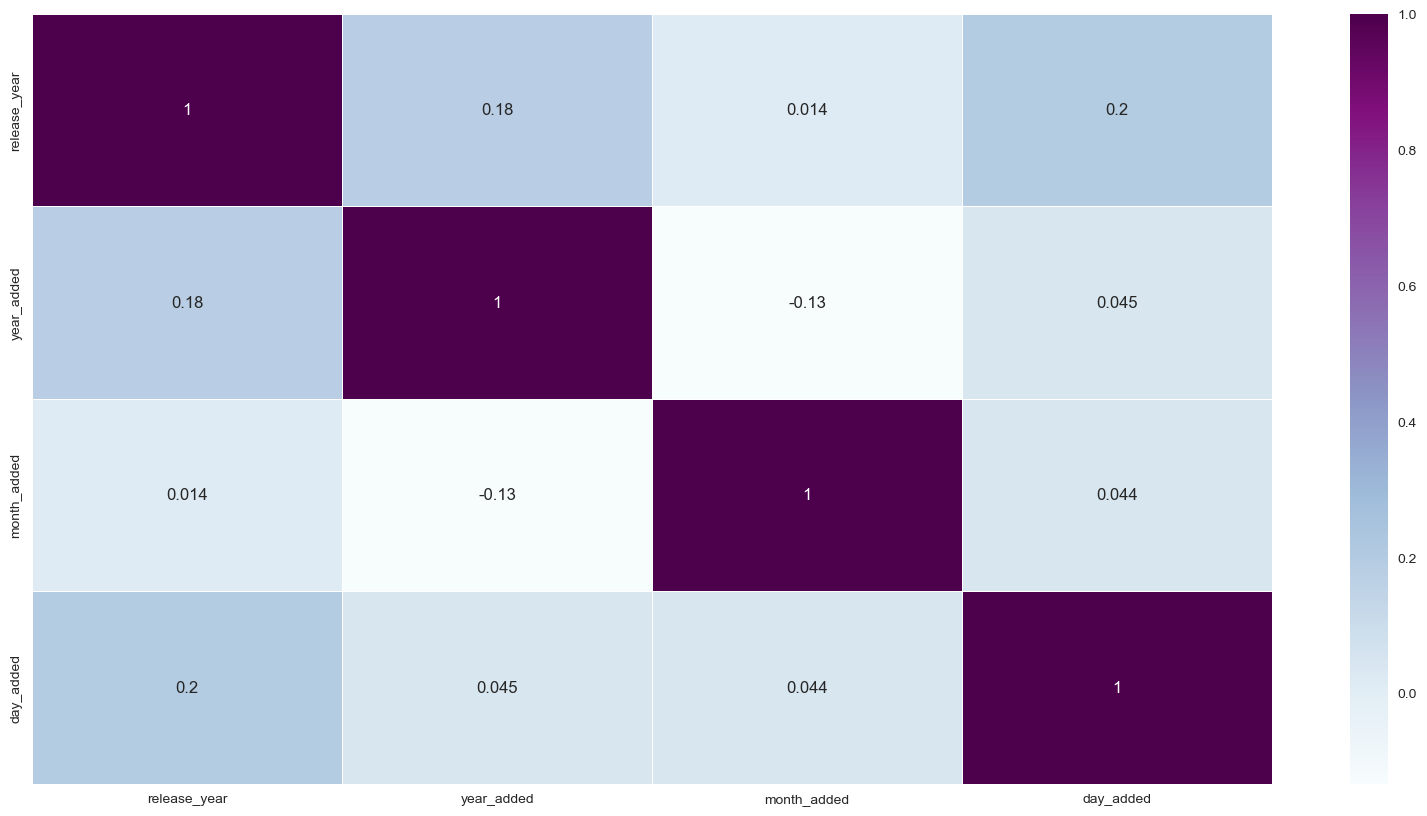

In [45]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()

- We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.

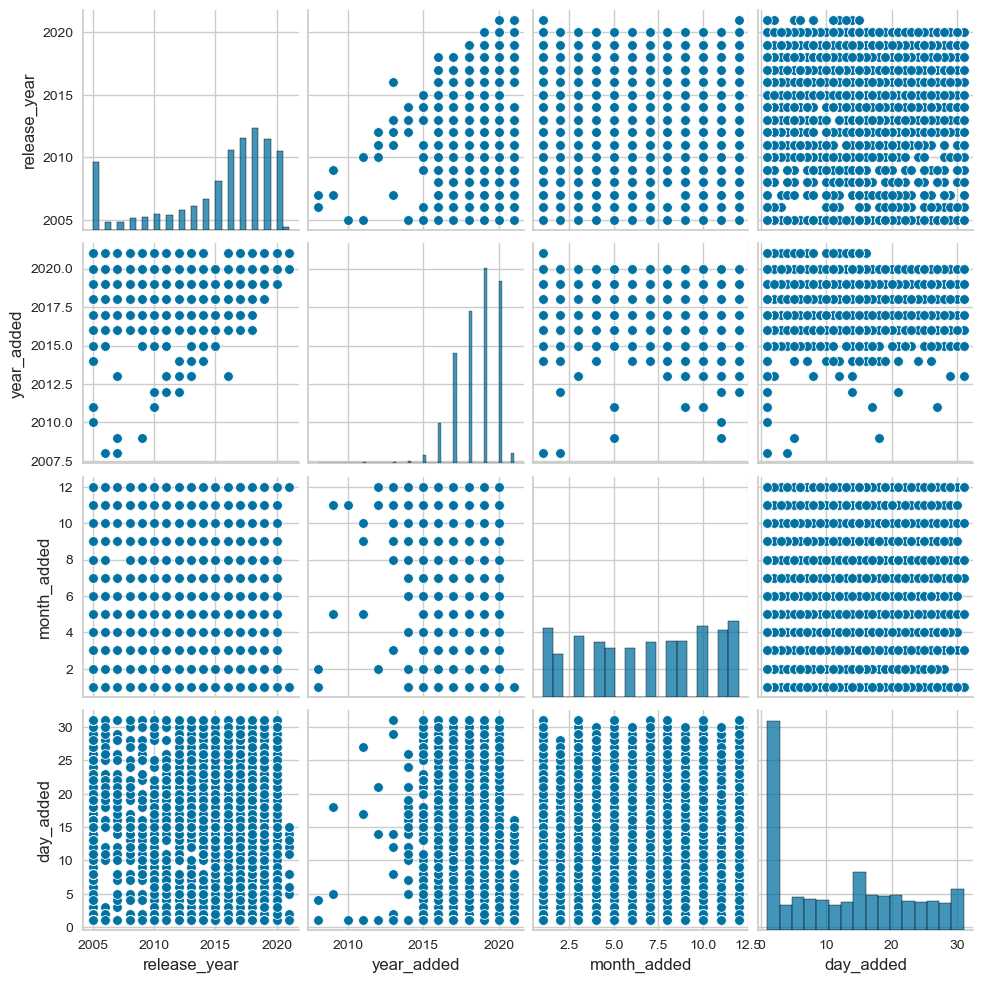

In [46]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

- Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
- We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

##### <b><u>Observations :</u></b>
- **We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.**
- **Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.**
- **We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.**

## **<u>Data Pre-processing</u>**

### **<u>[1] Textual Data Preprocessing</u>**

- We asked to cluster similar content by matching text-based features, so only the description variable from dataset is used for clustering. 

In [47]:
## Creating new feature having length of words of description variable 
df['description_len'] = df['description'].apply(lambda x: len(x.split()))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22


#### **<u>[1.1] Expand Contraction</u>**

- Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Removing contractions contributes to text standardisation because words play an important role in NLP.

In [48]:
# Install contraction library in the envirnoment
!pip install contractions

In [49]:
## Function to expands contractions from the corpus

# import contractions library
import contractions

def contraction_process(corpus):
    '''Function which expands contractions from the corpus
    Args:
    corpus (string): corpus to which function is to be applied
    Returns:
    corpus with expanded contractions
    '''
    corpus = contractions.fix(corpus)
    return corpus

# Apply the contraction_process function to each examples in description variable
df['contractions_description']=df['description'].apply(contraction_process)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...


- Using the contractions library in Python, contractions were successfully eliminated from the corpus.

#### **<u>[1.2] Lower Casing and Remove Stopwords and Punctuations</u>**

In [50]:
# Updating nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [51]:
# Importing stopwords from nltk library
from nltk.corpus import stopwords
# Extracting the English stopwords from nltk library
stopwords = stopwords.words('english')
# Displaying the English stopwords
np.array(stopwords)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [52]:
# Length of English stopwords
print("Number of English stopwords : ", len(stopwords))

Number of English stopwords :  179


In [53]:
# Import punctuations
import string
# Extracting punctuations
punctuations = string.punctuation
# Displaying the punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
## Creating new variable punctuation_% contain percentage of punctuations in each corpus
import string

def punctuation_count(txt):
    count = sum([1 for c in txt if c in punctuations])
    return 100*count/len(txt)

# Apply function to contractions_description variable
df['punctuation_%'] = df['contractions_description'].apply(lambda x: punctuation_count(x))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601


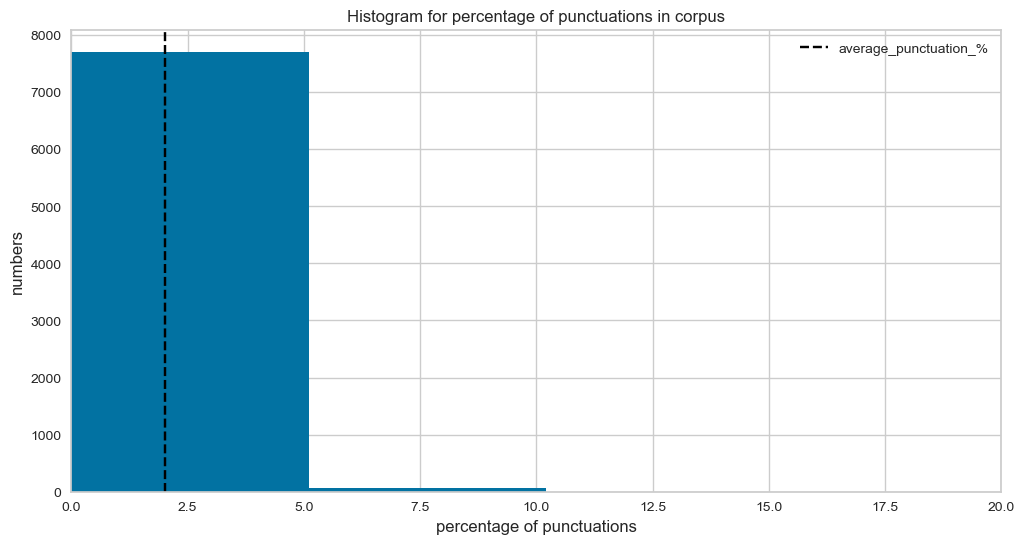

In [55]:
## Histogram for percentage of punctuations in contractions_description variable

# Define size of plot
plt.figure(figsize=(12,6))
bins = np.linspace(0, 250, 50)

# Plot histogram
plt.hist(df['punctuation_%'], bins)
plt.axvline(df['punctuation_%'].mean(), color='black', linestyle='dashed', label='average_punctuation_%')

# Labeling to plot
plt.title('Histogram for percentage of punctuations in corpus')
plt.xlabel('percentage of punctuations')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,20)

# Display plot
plt.show()

- **The majority of the corpus contains punctuation that accounts for less than 5% of the total corpus.**

In [56]:
## Function to remove stopwords and punctuations and lower casing to the corpus

def remove_stopwords_punctuations(corpus):
    '''Function which removes stopwords and punctuations and lower casing to the corpus
    Args:
    corpus (string) to which function is to be applied
    Returns:
    lowercase corpus without stopwords and punctuations
    '''
    nopunc =[char for char in corpus if char not in punctuations]
    nopunc=''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stopwords])

# Apply the remove_stopwords_punctuations function to each instance in variable contractions_description
df['no_sw_pun_description']=df['contractions_description'].apply(remove_stopwords_punctuations)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...


- Successfully converted to lower case and removed stopwords and punctuation from the corpus using function remove_stopwords_punctuations.

#### **<u>[1.3] Remove URLs</u>**

In [57]:
## Function to removes URL addresses from a corpus

# Import regex library
import re

def remove_URL(corpus):
    '''
    Removes URL addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without URL addresses
    ''' 
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
df['clean_description']=df['no_sw_pun_description'].apply(remove_URL)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


- All URLs are removed from each corpus from variable no_sw_pun_description.

#### **<u>[1.4] Remove Emails</u>**

In [58]:
## Function to removes email addresses from a corpus

def remove_emails(corpus):
    '''
    Removes email addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without email addresses
    ''' 
    corpus_split = corpus.split()
    return ' '.join([i for i in corpus_split if '@' not in i])

# Apply the remove_emails function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_emails)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


- Email addresses are removed from the corpus if they are present, using the remove_emails function.

#### **<u>[1.5] Removes HTML-Tags</u>**

In [59]:
## Function to removes HTML-Tags from a corpus

# Import BeautifulSoup library
from bs4 import BeautifulSoup

def remove_html_tags(corpus):
    '''
    Removes HTML-Tags from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied,
    Returns:
        Clean corpus without HTML-Tags
    ''' 
    return BeautifulSoup(corpus, 'html.parser').get_text()

# Apply the remove_html_tags function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_html_tags)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


- All HTML tags are removed using remove_html_tags function.

#### **<u>[1.6] Remove Special Characters</u>**

In [60]:
## Function to remove special characters

# Import regex library
import re

def remove_special_char(corpus):
    """Remove Special Characters from the corpus, if present
    args:
    corpus (string): corpus to which a function is to be applied
    return:
    clean corpus without  special characters
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Apply the remove_special_char function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_special_char)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


- Special characters from the corpus are successfully removed.

#### **<u>[1.7] Removing Words and Digits Contain Digits</u>**

In [61]:
## Function to removes digits from a corpus

# Import regex library
import re


def remove_digits(corpus):
    '''
    Removes digits from a corpus, if present
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        Clean string without digits
    ''' 
    return re.sub('\w*\d\w*','',corpus)

# Apply the remove_digits function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_digits)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


- The function remove_digits effectively removed digits from the corpus.

.

#### **<u>[1.8] Remove Whitespaces</u>**

In [62]:
## Function to removes extra whitespaces from a corpus

# Import regex library
import re

def remove_extra_whitespaces(corpus):
    '''
    Removes extra whitespaces from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', corpus).strip()

# Apply the remove_extra_whitespaces function to each instance to variable clean_description
df['clean_description']=df['clean_description'].apply(remove_extra_whitespaces)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...


- Extra whitespaces generated during the text processing are successfully removed.

#### **<u>[1.9] Tokenization</u>**

In [63]:
## Function for tokenizing the corpus

# Import dependancy
import nltk
nltk.download('punkt')

def tokenization_fun(corpus):
    '''
    Function tokenize corpus
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        tokenised corpus
    '''
    return nltk.word_tokenize(corpus)

# Apply the tokenization_fun function to each instance in variable clean_description
df['tokenized_description']=df['clean_description'].apply(tokenization_fun)
df.head()

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount..."


- We successfully tokenized each instance from the clean_description variable.

#### **<u>[1.10] Text Normalization</u>**

#### ***<u>Stemming</u>***

Stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words. There are various types of stemming algorithms like porter stemmer, snowball stemmer. Porter stemmer is widely used present in the NLTK library.

The stemming technique is not used for production purposes because it is not so efficient technique and most of the time it stems the unwanted words. So, to solve the problem another technique came into the market as Lemmatization.

So we use lemmitization, not stemming, for text normalization here.

- **We write the raw function, which stems the word using Porter Stemmer, but we will use only lemmatization for text normalization, so the stemming function is not to be executed.**

In [64]:
## Function to perform stemming operation on corpus

# Import lirary
from nltk.stem.porter import PorterStemmer

# Create object for stemming
porter_stemmer = PorterStemmer()

# Creating function for stemming
def stemming(tokenized_text):
    '''Function which stem each word in token'''
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

- **We write the raw function, which stems the word using Porter Stemmer, but we will use only lemmatization for text normalization, so the stemming function is not to be executed.**

#### ***<u>Lemmatization</u>***

Lemmatization is similar to stemming but it brings context to the words. Lemmatization is similar to stemming, used to stem the words into root word but differs in working. Actually, Lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary. Lemmatization only stemmed those words which are really required as per the language dictionary.

In [65]:
## Function to perform lemmatization operation on corpus

# Import lirary
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create object for lemmatization
lemmatizer = WordNetLemmatizer()

# Creating function for lemmatization
def lemmatization(tokenized_text):
    '''Function which lemmatize each word in token'''
    text = [lemmatizer.lemmatize(word, pos="v") for word in tokenized_text]
    return text

# Apply the lemmatization function to each instance in variable tokenized_description
df['lemmatized_description'] = df['tokenized_description'].apply(lambda x : lemmatization(x))
df.head()

[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


,show_id,type,title,director,cast,country,release_year,rating,duration,geners,...,year_added,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",...,2018,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount..."


- We successfully lemmatized each tokenized corpus.

#### **<u>[1.11] Join all words back together after Text Normalization</u>**

- You don't need to keep words tokenized. Join them back together after you normalize so that there is one string in each row.

In [66]:
## Creating new feature which Join all words back together in string in each row
df['final_description'] = df['lemmatized_description'].apply(lambda x: ' '.join(x))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,...,month_added,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,8,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",...,12,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,...,1,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...


In [67]:
## Creating new feature having length of words of variable final_description after joining back to string 
df['final_description_len'] = df['final_description'].apply(lambda x: len(x.split()))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,...,day_added,description_len,contractions_description,punctuation_%,no_sw_pun_description,clean_description,tokenized_description,lemmatized_description,final_description,final_description_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,14,26,In a future where the elite inhabit an island ...,2.205882,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far...","[future, elite, inhabit, island, paradise, far...",future elite inhabit island paradise far crowd...,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,"[devastating, earthquake, hits, mexico, city, ...","[devastate, earthquake, hit, mexico, city, tra...",devastate earthquake hit mexico city trap surv...,15
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",...,20,24,"When an army recruit is found dead, his fellow...",1.333333,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,"[army, recruit, found, dead, fellow, soldiers,...","[army, recruit, find, dead, fellow, soldier, f...",army recruit find dead fellow soldier force co...,15
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,postapocalyptic world ragdoll robots hide fear...,postapocalyptic world ragdoll robots hide fear...,"[postapocalyptic, world, ragdoll, robots, hide...","[postapocalyptic, world, ragdoll, robots, hide...",postapocalyptic world ragdoll robots hide fear...,13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,...,1,22,A brilliant group of students become card-coun...,1.398601,brilliant group students become cardcounting e...,brilliant group students become cardcounting e...,"[brilliant, group, students, become, cardcount...","[brilliant, group, students, become, cardcount...",brilliant group students become cardcounting e...,14


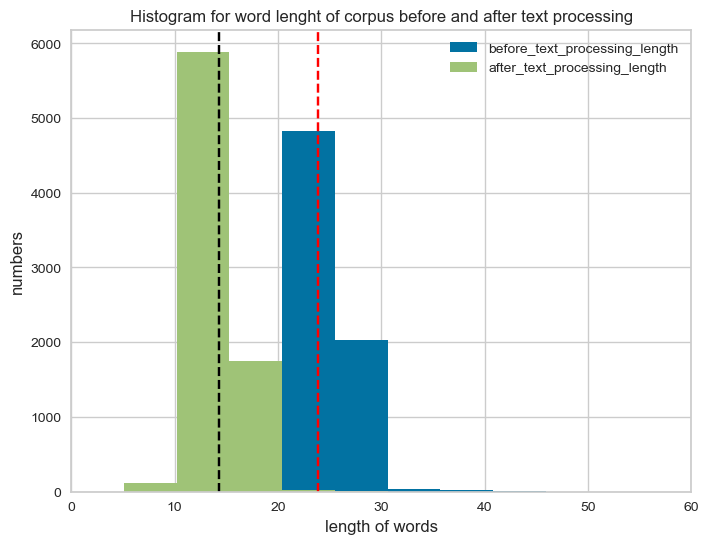

In [68]:
## Histogram for lenght of word before and after text processing

# Define figure size
plt.figure(figsize=(8,6))
bins = np.linspace(0, 250, 50)

# Plot histograms
plt.hist(df['description_len'], bins, label='before_text_processing_length')
plt.hist(df['final_description_len'], bins, label='after_text_processing_length')

# Plot vertically mean
plt.axvline(df['description_len'].mean(), color='red', linestyle='dashed')
plt.axvline(df['final_description_len'].mean(), color='black', linestyle='dashed')

# Labeling plot
plt.title('Histogram for word lenght of corpus before and after text processing')
plt.xlabel('length of words')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,60)

# Display the plot
plt.show()

- **After text processing, each corpus has, on average, 14 words, but before text processing, each corpus contains, on average, 24 words.**

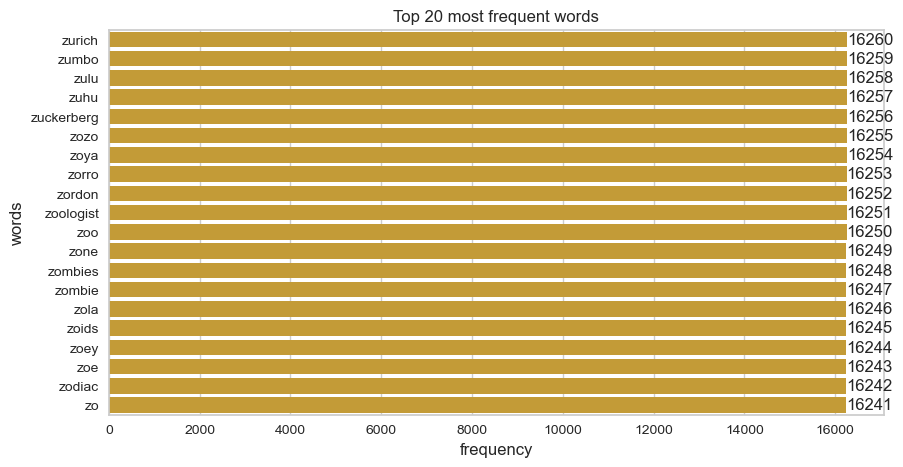

In [69]:
#### Top words after cleaning text

## Collect vocabulary count

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
X = tfid_vectorizer.fit(df['final_description'])

# Collect the vocabulary items used in the vectorizer
dictionary = X.vocabulary_.items()

## Bar plot of top words after cleaning text

# Lists to store the vocab and counts
vocab = []
count = []

# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

# Store the count in panadas dataframe with vocab as index
vocab_count_df = pd.Series(count, index=vocab)

# Sort the dataframe
vocab_count_df= vocab_count_df.sort_values(ascending=False)

# Top 20 vocab
top_vacab = vocab_count_df.head(20)

# Plot of the top 20 vocab
plt.figure(figsize=(10,5))
ax=sns.barplot(y=top_vacab.index, x=top_vacab.values, color='goldenrod')
ax.set_title('Top 20 most frequent words')
ax.set_xlabel('frequency')
ax.set_ylabel('words')
ax.bar_label(ax.containers[0])
plt.show()

- **zurich, zumbo, zulu, zuhu, and zuckerberg are the top 5 most frequent words in the corpus.**

#### **<u>[1.12] Text Vectorization</u>**

In [70]:
## Vetorization

# Extract the tfid representation matrix of the text data

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the object of tfid vectorizer
vectorizer=TfidfVectorizer()

# Fit the vectorizer using the text data
X_tfidf = vectorizer.fit_transform(df['final_description'])

In [71]:
# Collect the tfid matrix in numpy array
X_array = X_tfidf.toarray()
X_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.32029921,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
# Shape of the array
X_array.shape

(7770, 16261)

- Array having 7770 observations and 16261 features
- You can also implement PCA for dimension reduction or just use the parameter max_features={value} in the TFIDFvector object to dimension reduction. But if you use PCA, then you need to again do text vectorization on new data generated after PCA.

In [73]:
# Store the tf-idf array into pandas dataframe
dataset = pd.DataFrame(X_array, columns = vectorizer.get_feature_names_out())
dataset.head()

,aaliya,aamir,aang,aardman,aaron,abad,abagnale,abah,abandon,abandonment,...,zoologist,zordon,zorro,zoya,zozo,zuckerberg,zuhu,zulu,zumbo,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- This is our final dataset after all text processing.

In [74]:
# Defining input data to models
X=dataset.values

In [75]:
# First five instances of input data
X[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- You can also give input to the model, as it is an array.

## **<u>ML Model Implementation</u>**

In [76]:
## Function to evaluate and visualize evaluation metrics of the model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    # Create a plot
    # Creating silhouette visualizer
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(X)    
    visualizer.poof()
    print('~~'*45)
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'y_predict':y_predict, 'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [77]:
## Function to visualise clusters

def visualize_clusters(X, y_predict):
    # X is a 2D array of data points
    # y_predict is a 1D array of integer labels indicating which cluster each data point belongs to

    # Create a scatter plot of the data points, colored by their assigned cluster label
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='rainbow')

    # Show the plot
    plt.show()

### **[1]  K-Means Clustering**

#### **<u>Elbow Method</u>**
Finding the optimal number of clusters using the elbow method

In [78]:
# Install yellowbrick library
!pip install yellowbrick

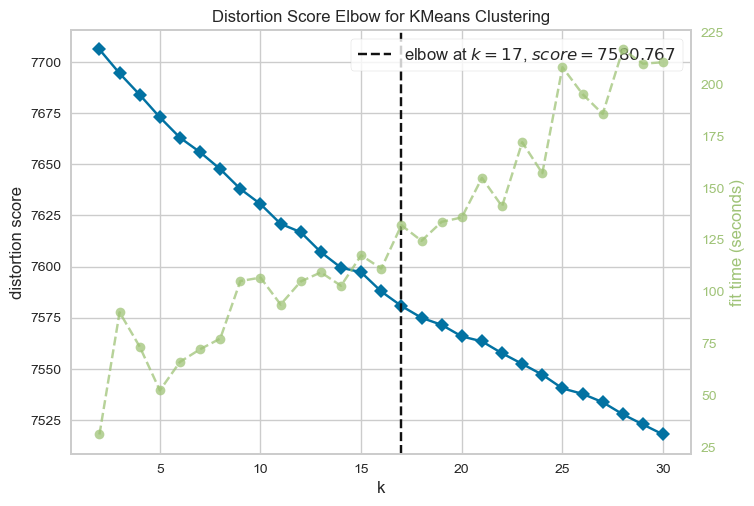

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
## Finding the optimal number of clusters using the Elbow Method

# Import from KMeans algoritham and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Instantiate the clustering model and visualizer
KMeans_model = KMeans(random_state=42)
elb_visualizer = kelbow_visualizer(KMeans_model, X, k=(2,31), locate_elbow=True)

# Display figure
elb_visualizer.show()

# elb_visualizer.poof()

In [80]:
# Optimal number of cluster
elbow_optimal_K=elb_visualizer.elbow_value_
print(f'Optimal number of cluster using Elbow method : {elbow_optimal_K}')

Optimal number of cluster using Elbow method : 17


#### **<u>Silhouette Score Method</u>**
Finding optimal number of cluster using silhouette score method

In [81]:
## Finding the optimal number of clusters using the Silhouette Score Method

# Import from KMeans algoritham and metric silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

num_of_cluster=range(2,31)

for i in num_of_cluster:
    clusterer=KMeans(n_clusters=i)
    preds=clusterer.fit_predict(X)
    centers=clusterer.cluster_centers_
    score=silhouette_score(X, preds)
    print(f"For number of clusters = {i}, silhouette score is {score}")

For number of clusters = 2, silhouette score is 0.0010211815332685794
For number of clusters = 3, silhouette score is 0.0011974875560115804
For number of clusters = 4, silhouette score is 0.0016617607266965497
For number of clusters = 5, silhouette score is 0.0017849053532870932
For number of clusters = 6, silhouette score is 0.0025401903443548913
For number of clusters = 7, silhouette score is 0.002507361027029193
For number of clusters = 8, silhouette score is 0.0026755713508857743
For number of clusters = 9, silhouette score is 0.0031997479577665047
For number of clusters = 10, silhouette score is 0.0033247857695118837
For number of clusters = 11, silhouette score is 0.0036019073435541544
For number of clusters = 12, silhouette score is 0.003728719904409987
For number of clusters = 13, silhouette score is 0.0040014235780521405
For number of clusters = 14, silhouette score is 0.004198203650147074
For number of clusters = 15, silhouette score is 0.004285486854336519
For number of clus

In [82]:
# Optimal number of cluster
silhouette_optimal_K=30
print(f'Optimal number of cluster using the Silhouette Score Method : {silhouette_optimal_K}')

Optimal number of cluster using the Silhouette Score Method : 30


- **The optimal number of clusters using the elbow method is 17, and the optimal number of clusters using the silhouette score method is 30. but we choose number of clusters 17 finded by using the elbow method for building the model.**

In [83]:
## Training the K-means model on a dataset for number of clusters K=17

# Import dependancy
from sklearn.cluster import KMeans
# Fitting model
kmeans = KMeans(n_clusters=17, init='k-means++', random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=17, random_state=42)

In [84]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

array([[ 4.74338450e-20,  8.13151629e-20,  2.71050543e-20, ...,
         5.42101086e-20, -3.38813179e-20, -3.38813179e-20],
       [ 6.09863722e-20,  0.00000000e+00,  2.71050543e-20, ...,
         6.09863722e-20, -2.71050543e-20,  6.77626358e-21],
       [ 7.45388994e-20,  8.13151629e-20,  3.38813179e-20, ...,
         6.77626358e-20, -4.06575815e-20, -4.06575815e-20],
       ...,
       [ 7.45388994e-20,  2.71050543e-20,  2.71050543e-20, ...,
         6.09863722e-20, -3.38813179e-20,  0.00000000e+00],
       [-1.35525272e-20,  1.35525272e-19,  0.00000000e+00, ...,
         0.00000000e+00,  1.35525272e-20,  0.00000000e+00],
       [ 2.71050543e-20,  1.21972744e-19,  3.38813179e-20, ...,
         4.06575815e-20, -2.03287907e-20, -2.71050543e-20]])

In [85]:
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia

7580.767389988911

In [86]:
# Predict result
y_predict= kmeans.predict(X)
y_predict

array([15, 15,  1, ..., 12, 12, 12])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 17
Silhouette score: 0.004634342205827001
Calinski-Harabasz score: 9.0392472277542
Davies-Bouldin score: 11.84405372425655
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        |  0.00463434 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  9.03925    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 11.8441     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



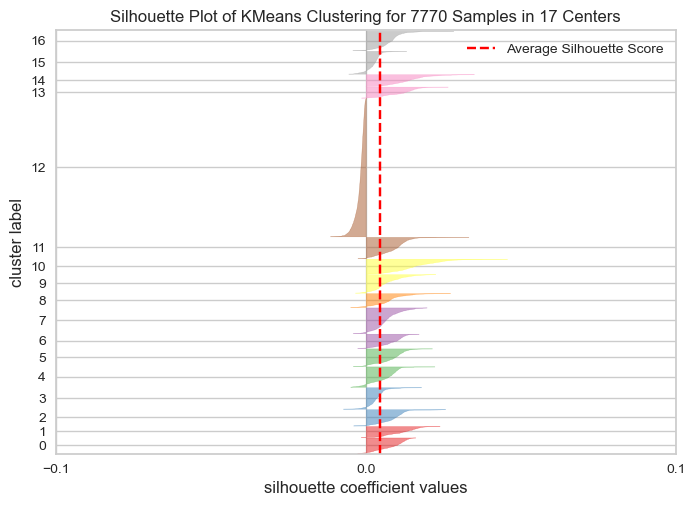

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


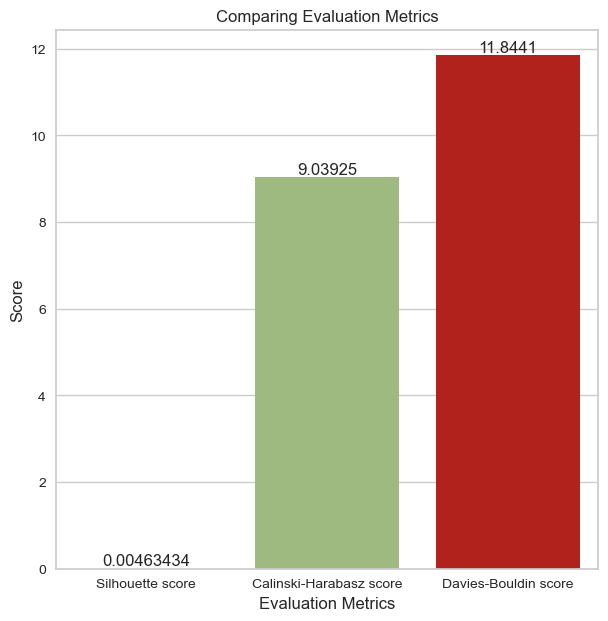

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [87]:
# Evaluation of Model
Kmeans_eval=evaluate_clustering_model(kmeans, X, y_predict)

- **We got a Silhouette score of 0.00463434, a Calinski-Harabasz score of 9.03925, and a Davies-Bouldin score of 11.8441 after evaluation of the model.**

In [88]:
## Assigne Movies and TV Shows to its cluster


# Copy dataset
kmeans_df=df.copy()

# Droping non original features from dataset
kmeans_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
kmeans_df['cluster'] = kmeans.labels_
kmeans_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,15
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,15
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,5
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,6


Text(0, 0.5, 'Number of Movies / TV Shows')

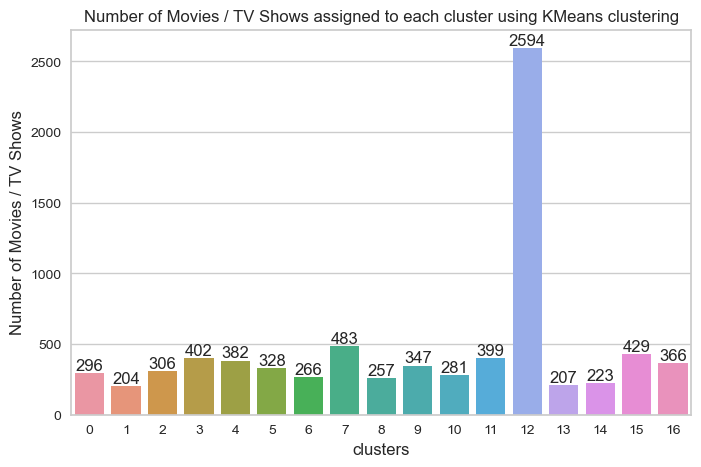

In [89]:
## Finding number of Movies / TV Shows in each cluster

# Creat dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=kmeans_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using KMeans clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

- **Cluster 12 has the most number of movies and TV shows, followed by clusters 7 and 15.**

### **[2]  Hierarchical Clustering**

#### **<u>Dendogram Method</u>**
Finding the optimal number of clusters using the dendogram

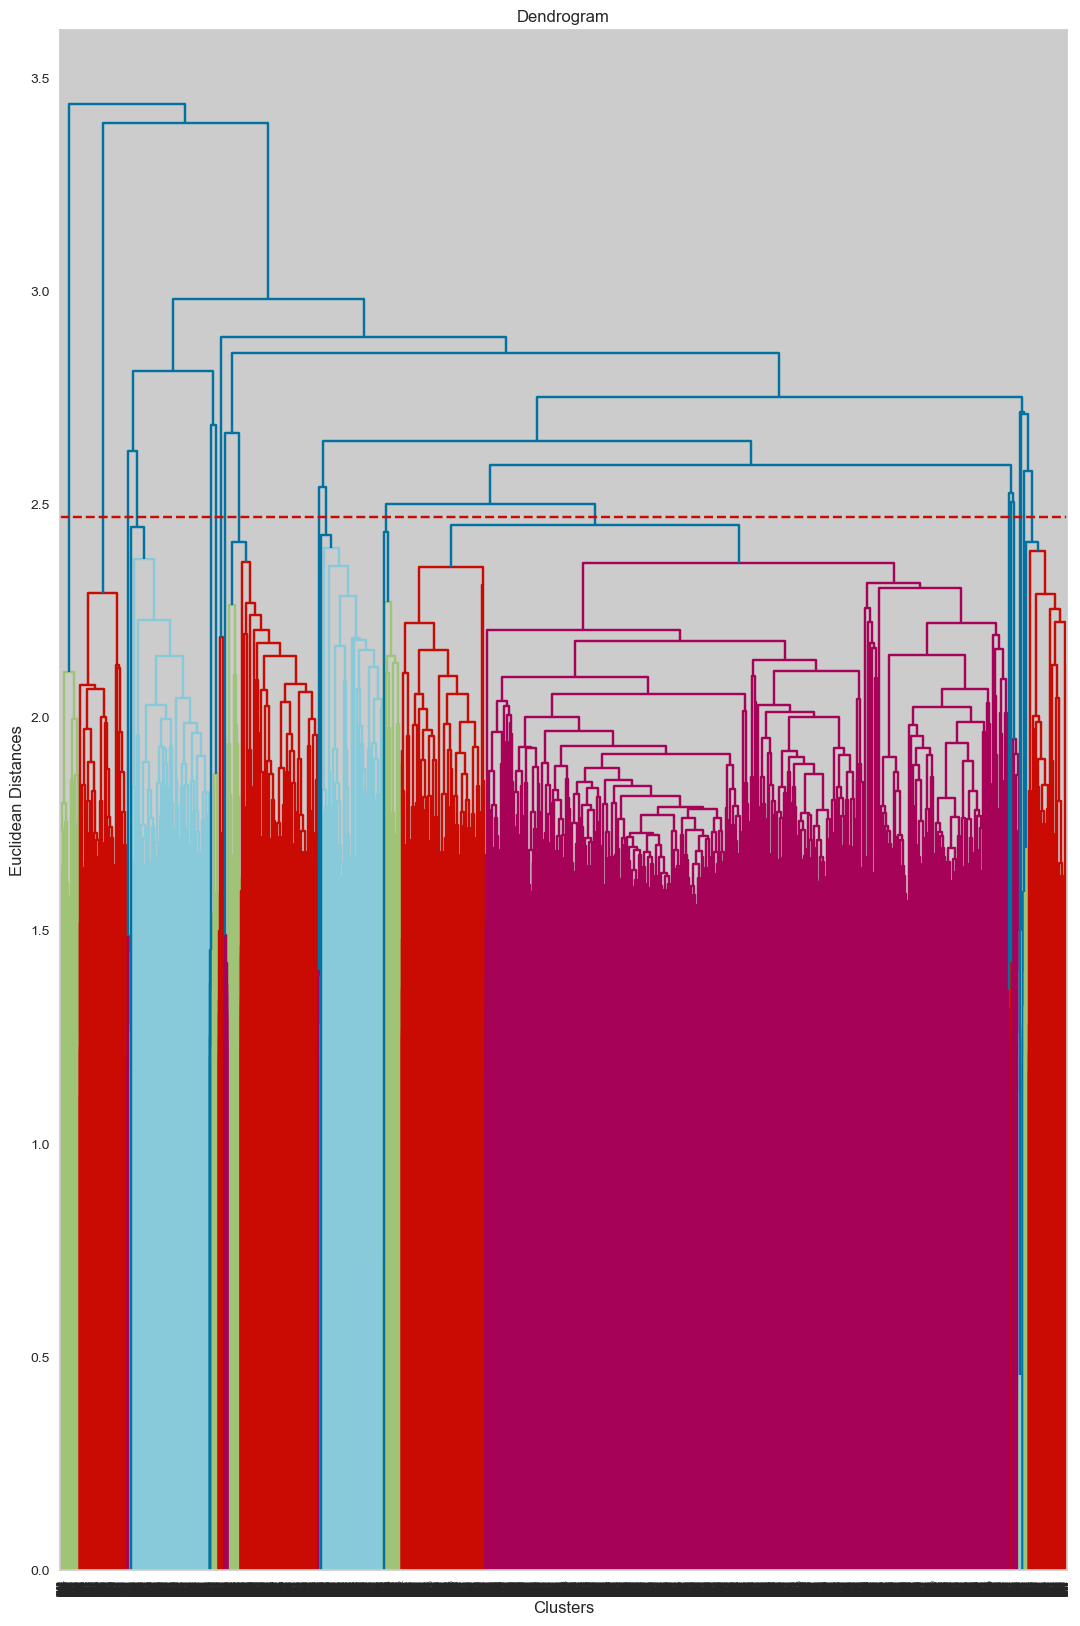

In [90]:
## Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Plotting dendogram
plt.figure(figsize=(13,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=2.47, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

- **After cutting the horizontally tallest vertical line, 19 vertical lines are intersected, and we get the optimal number of clusters : 19**

#### **<u>Silhouette Score Method</u>**
Finding optimal number of cluster using silhouette score method

- **Wrote only raw python code to finding the optimal number of cluster using the silhouette score method but it takes too long time to get optimal number of clusters, so we skiped it and considered the optimal number of clusters found using a dendogram.**

- **Wrote only raw python code to finding the optimal number of cluster using the silhouette score method but it takes too long time to get optimal number of clusters, so we skiped it and considered the optimal number of clusters found using a dendogram.**

- **The optimal number of clusters using the dendogram method is 19 and we choose number of clusters 19 found by using the dendogram method for building the model.**

In [91]:
## Training the hierarchical clustering model on a dataset for number of clusters K=19

# Import dependancy
from sklearn.cluster import AgglomerativeClustering
# Fitting model
hc = AgglomerativeClustering(n_clusters = 19, affinity = 'euclidean', linkage = 'ward', compute_distances=True)
hc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_distances=True,
                        n_clusters=19)

In [92]:
# Predict result
y_predict= hc.labels_
y_predict

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [93]:
### Evaluation of hierarchical clustering model
## Function to evaluate and visualize evaluation metrics of the hierarchical clustering model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def hierarchical_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of clusters: 19
Silhouette score: -0.004158031589248701
Calinski-Harabasz score: 3.9312015400539924
Davies-Bouldin score: 10.419206158995973
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00415803 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  3.9312     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 10.4192     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



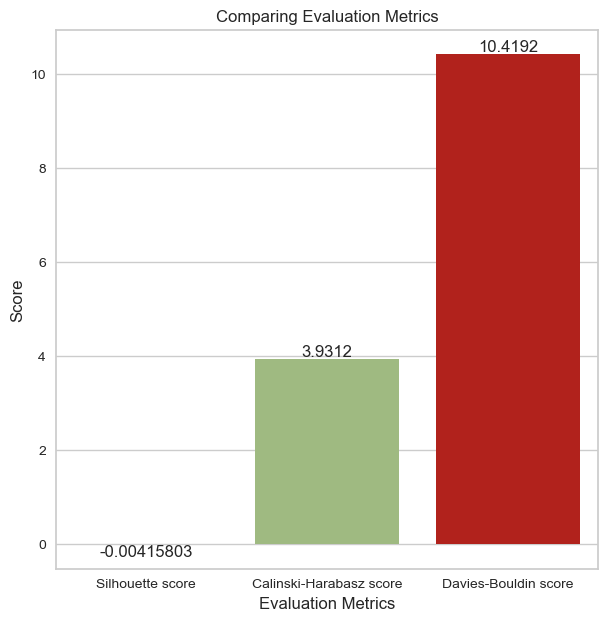

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [94]:
# Evaluation of Model
hc_eval=hierarchical_clustering_eval(hc, X, y_predict)

- **We got a Silhouette score of  -0.00415803, a Calinski-Harabasz score of 3.9312, and a Davies-Bouldin score of 10.4192 after evaluation of the model.**

In [95]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
hc_df=df.copy()

# Droping non original features from dataset
hc_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
hc_df['cluster'] = hc.labels_
hc_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,0


Text(0, 0.5, 'Number of Movies / TV Shows')

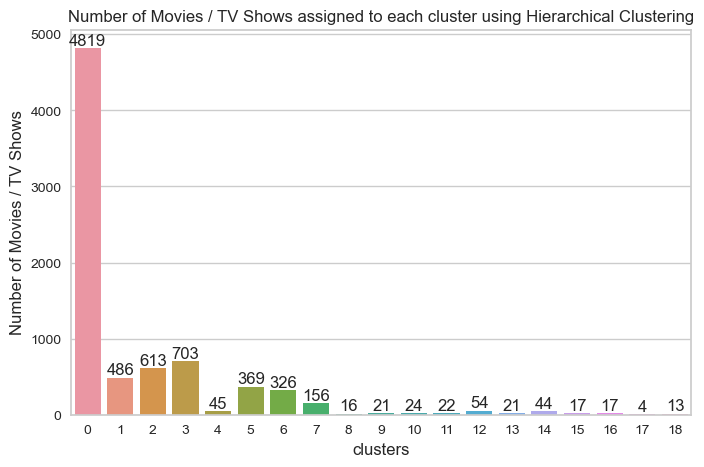

In [96]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=hc_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using Hierarchical Clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

- **Cluster 0 has the most number of movies and TV shows, followed by clusters 3 and 2.**

### **[3]  DBSCAN Clustering**
Density-Based Spatial Clustering of Applications with Noise

In [97]:
## Training the DBSCAN model on a dataset

# Import dependancy
from sklearn.cluster import DBSCAN
# Fitting model
dbscan = DBSCAN(eps=0.0375, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.0375, min_samples=3)

In [98]:
# Predict result
y_predict = dbscan.labels_
y_predict

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [99]:
### Evaluation of DBSCAN model
## Function to evaluate and visualize evaluation metrics of the DBSCAN model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dbscan_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of clusters: 4
Silhouette score: -0.0037570617776546454
Calinski-Harabasz score: 3.0032273127756643
Davies-Bouldin score: 1.0000670327118095
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        | -0.00375706 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score |  3.00323    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    |  1.00007    |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



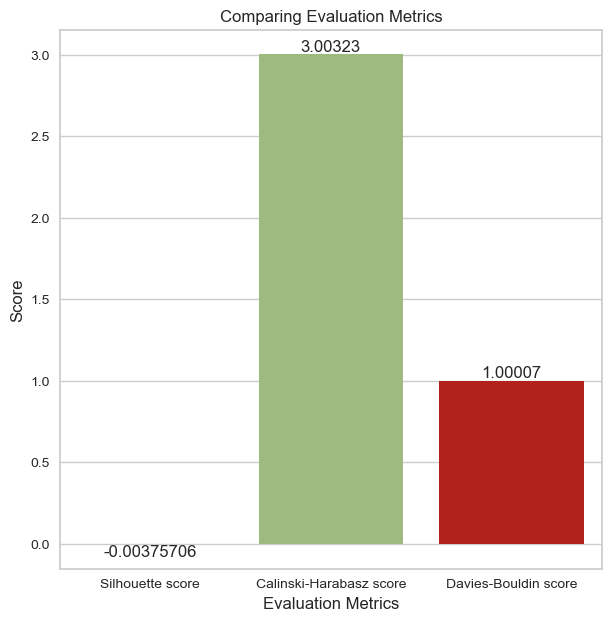

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [100]:
# Evaluation of Model
dbscan_eval=dbscan_clustering_eval(dbscan, X, y_predict)

- **We got a Silhouette score of -0.00375706, a Calinski-Harabasz score of 3.00323, and a Davies-Bouldin score of 1.00007 after evaluation of the model.**

In [101]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
dbscan_df=df.copy()

# Droping non original features from dataset
dbscan_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
dbscan_df['cluster'] = dbscan.labels_
dbscan_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,year_added,month_added,day_added,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,-1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,-1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,-1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,-1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,-1


Text(0, 0.5, 'Number of Movies / TV Shows')

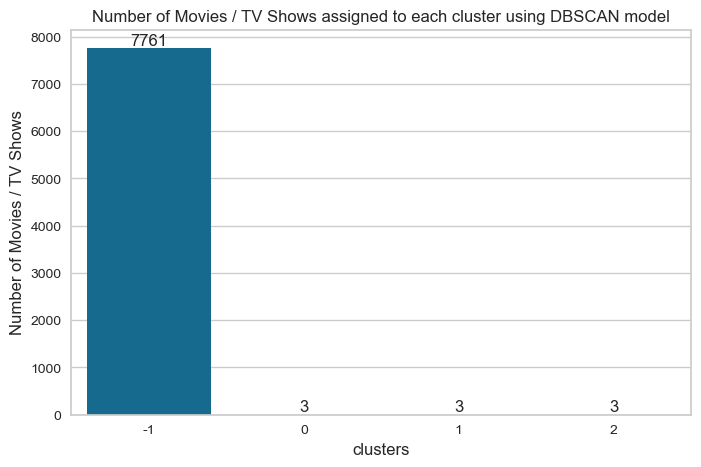

In [102]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=dbscan_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using DBSCAN model")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

- **Cluster -1 has assigned the most number of movies and TV shows.**

## **<u>Comparing Different Models based on the Evaluation Metrics</u>**

In [103]:
## Creating dataframe of performance metrics of all builded models

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhouette_score=[Kmeans_eval['silhouette'],hc_eval['silhouette'],dbscan_eval['silhouette']]
calinski_harabasz_score=[Kmeans_eval['ch_score'],hc_eval['ch_score'],dbscan_eval['ch_score']]
davies_bouldin_score=[Kmeans_eval['db_score'],hc_eval['db_score'],dbscan_eval['db_score']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'silhouette_score': silhouette_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                     'davies_bouldin_score':davies_bouldin_score})
# Dataframe
models_evaluation_df

,model,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,K-Means Clustering,0.004634,9.039247,11.844054
1,Hierarchical Clustering,-0.004158,3.931202,10.419206
2,DBSCAN Clustering,-0.003757,3.003227,1.000067


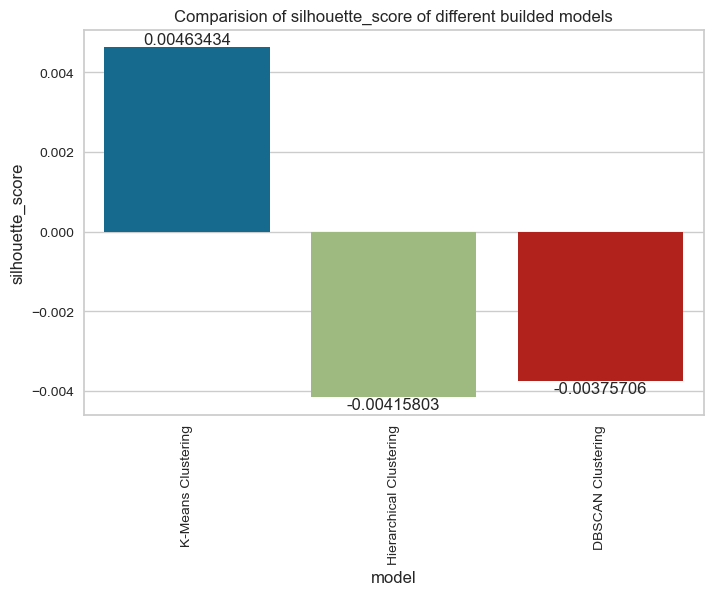

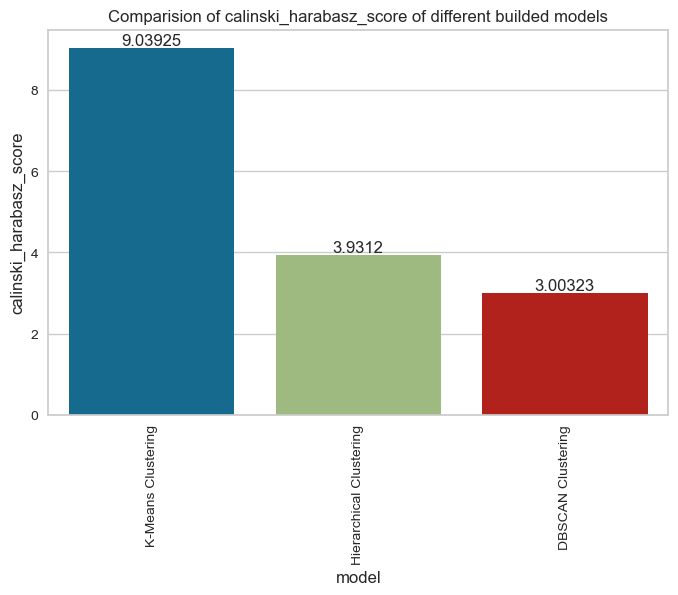

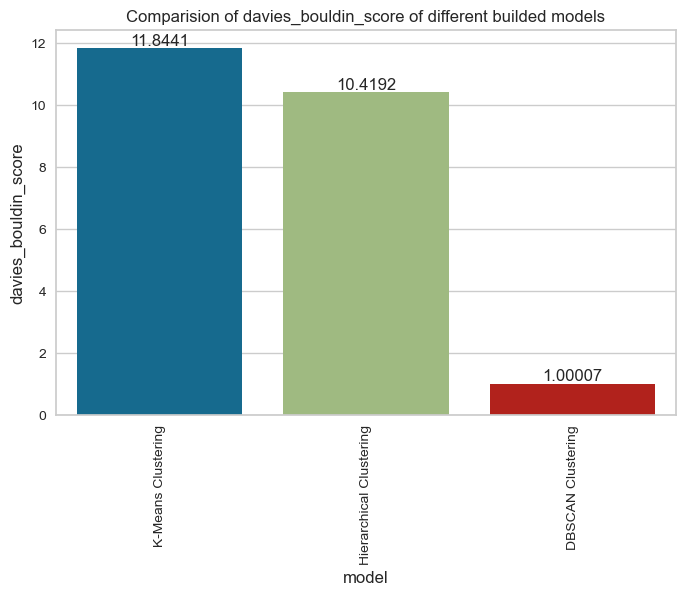

In [104]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different builded models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

**<u>Observations</u> :**
- Model K-Means Clustering has a silhouette_score of 0.004634, which is close to 1 compared to models Hierarchical Clustering (-0.004158) and DBSCAN Clustering (-0.003757).
- Model K-Means Clustering has the highest calinski_harabasz_score of 9.039247 compared to models Hierarchical Clustering (3.931202) and DBSCAN Clustering (3.003227).
- Models Hierarchical Clustering (10.419206) and DBSCAN Clustering (1.000067) have lower davies bouldin scores than model K-Means Clustering, which has the maximum score of 11.844054.
- #### **Among all models, the K-Means Clustering model has the highest Calinski-Harabasz score (9.039247). Also, K-Means Clustering  model has a silhouette_score of 0.004634, which is close to 1 than other models, which means the K-Means Clustering model is capable of perfectly clustering items.**
- #### **Due to its high Calinski-Harabasz score (9.039247) and silhouette_score (0.004634), which are close to 1, the K-Means Clustering model is the ideal model and well-trained for clustering movies and TV shows based on the content.**

## **<u>Conclusion </u>**

#### **<u>The following observations were made after importing and analyzing the data :</u>**
- More movies (69.14%) than TV shows (30.86%) are available on Netflix.
- The majority of Netflix movies were released between 2015 and 2020, and the majority of - Netflix TV shows were released between 2018 and 2020.
- The most movies and TV shows were released for public viewing on Netflix in 2017 and 2020, respectively, out of all released years.
- From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.
- More TV shows will be released for public viewing in 2020 and 2021 than at any other time in the history of Netflix.
- The majority of TV shows and movies available on Netflix have a TV-MA rating, with a TV-14 rating coming in second.
- The majority of movies added to Netflix in 2019 and the majority of TV shows added to - Netflix in 2020.
- In 2019, Netflix added nearly one-fourth (27.71%) of all content (TV shows and movies).
- The majority of the content added to Netflix was in October and January, respectively, but almost all months throughout the year saw Netflix adding content to its platform.
- Netflix has more movies (69.14%) than TV shows (30.86%).
- The majority of movies available on Netflix are produced in the United States, with India coming in second.
- The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.
- Raul Campos and Jan Suter directed most of the movies available on Netflix for public viewing.
- Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.
- International movies and the second-most popular dramas are available on Netflix as content.
- Actors who have appeared in films and TV shows that are most available on Netflix are Lee, Michel, David, Jhon, and James.
- We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.
- Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
- We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

- ### **The K-Means Clustering model has the highest Calinski-Harabasz score out of all the models (9.039247). Also, the silhouette score for the K-Means Clustering model is 0.004634, which is close to one compared to other models, indicating that it can cluster Movies and TV shows perfectly based on the content.**
- ### **The K-Means Clustering model is the optimal model and well-trained for clustering TV shows and movies based on the content due to its high Calinski-Harabasz score (9.039247) and silhouette score (0.004634), which are close to 1 than other builded models.**